# DATA CLEANING STARTS


In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [257]:
df=pd.read_csv(r'C:\Users\ritika shukla\Downloads\qua\purchase.csv')
df.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [258]:
df.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [260]:
df1=pd.read_excel(r'C:\Users\ritika shukla\Downloads\qua\transaction.xlsx')
df1.head()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [261]:
df_merged=df.merge(df1[['DATE','STORE_NBR','LYLTY_CARD_NBR', 'PROD_NAME','PROD_QTY','TOT_SALES']])
df_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,WW Original Stacked Chips 160g,1,1.9


In [262]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  int64         
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  datetime64[ns]
 4   STORE_NBR         264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 16.2+ MB


In [263]:
df_merged['PROD_NAME']=df_merged['PROD_NAME'].str.lower()
df_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,natural chip compny seasalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,red rock deli chikn&garlic aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,grain waves sour cream&chives 210g,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,natural chipco hony soy chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,ww original stacked chips 160g,1,1.9


In [264]:
regex='chip'
df_merged=df_merged[df_merged['PROD_NAME'].str.contains(regex)==True]
df_merged

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,natural chip compny seasalt175g,2,6.0
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,natural chipco hony soy chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,ww original stacked chips 160g,1,1.9
14,1011,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,1,smiths crinkle cut chips barbecue 170g,1,2.9
17,1013,RETIREES,Budget,2019-03-04,1,doritos corn chip southern chicken 150g,1,3.9
...,...,...,...,...,...,...,...,...
264814,2330251,RETIREES,Budget,2018-11-29,77,smiths crnkle chip orgnl big bag 380g,2,11.8
264818,2330291,OLDER SINGLES/COUPLES,Mainstream,2019-06-18,77,ww d/style chip sea salt 200g,1,1.9
264819,2330311,YOUNG SINGLES/COUPLES,Budget,2018-11-09,77,tostitos smoked chipotle 175g,1,4.4
264828,2370581,OLDER SINGLES/COUPLES,Budget,2018-12-17,88,doritos corn chip southern chicken 150g,2,7.8


In [265]:
df_merged['pos']=df_merged['PROD_NAME'].str.find(' ')
df_merged['BRAND']=df_merged.apply(lambda x: x['PROD_NAME'][0:x['pos']], axis=1)
df_merged.head()



,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pos,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,natural chip compny seasalt175g,2,6.0,7,natural
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,natural chipco hony soy chckn175g,1,3.0,7,natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,ww original stacked chips 160g,1,1.9,2,ww
14,1011,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,1,smiths crinkle cut chips barbecue 170g,1,2.9,6,smiths
17,1013,RETIREES,Budget,2019-03-04,1,doritos corn chip southern chicken 150g,1,3.9,7,doritos


In [266]:
df_merged.drop(['LYLTY_CARD_NBR','pos'], axis='columns', inplace=True)
df_merged.head()

,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,natural chip compny seasalt175g,2,6.0,natural
3,YOUNG FAMILIES,Budget,2019-03-08,1,natural chipco hony soy chckn175g,1,3.0,natural
4,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,ww original stacked chips 160g,1,1.9,ww
14,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,1,smiths crinkle cut chips barbecue 170g,1,2.9,smiths
17,RETIREES,Budget,2019-03-04,1,doritos corn chip southern chicken 150g,1,3.9,doritos


In [267]:
df_merged['pos']=df_merged['PROD_NAME'].str.find('chip')
df_merged['new']=df_merged.apply(lambda x: x['PROD_NAME'][x['pos']: ], axis=1)
df_merged.head()



,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,pos,new
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,natural chip compny seasalt175g,2,6.0,natural,8,chip compny seasalt175g
3,YOUNG FAMILIES,Budget,2019-03-08,1,natural chipco hony soy chckn175g,1,3.0,natural,8,chipco hony soy chckn175g
4,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,ww original stacked chips 160g,1,1.9,ww,20,chips 160g
14,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,1,smiths crinkle cut chips barbecue 170g,1,2.9,smiths,20,chips barbecue 170g
17,RETIREES,Budget,2019-03-04,1,doritos corn chip southern chicken 150g,1,3.9,doritos,13,chip southern chicken 150g


In [268]:
df_merged.drop(['PROD_NAME','pos'], axis='columns', inplace=True)
df_merged.head()


,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_QTY,TOT_SALES,BRAND,new
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,2,6.0,natural,chip compny seasalt175g
3,YOUNG FAMILIES,Budget,2019-03-08,1,1,3.0,natural,chipco hony soy chckn175g
4,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,1,1.9,ww,chips 160g
14,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,1,1,2.9,smiths,chips barbecue 170g
17,RETIREES,Budget,2019-03-04,1,1,3.9,doritos,chip southern chicken 150g


In [269]:
df_merged['pos']=df_merged['new'].str.find(' ')
df_merged['PRODUCTS']=df_merged.apply(lambda x: x['new'][0:x['pos']], axis=1)
df_merged.drop(['new','pos'], axis='columns', inplace=True)
df_merged.head()


,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_QTY,TOT_SALES,BRAND,PRODUCTS
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,2,6.0,natural,chip
3,YOUNG FAMILIES,Budget,2019-03-08,1,1,3.0,natural,chipco
4,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,1,1.9,ww,chips
14,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,1,1,2.9,smiths,chips
17,RETIREES,Budget,2019-03-04,1,1,3.9,doritos,chip


In [270]:
df_merged['PRODUCTS']=df_merged['PRODUCTS'].str.replace('chip','chips')
df_merged.head()

,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_QTY,TOT_SALES,BRAND,PRODUCTS
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,2,6.0,natural,chips
3,YOUNG FAMILIES,Budget,2019-03-08,1,1,3.0,natural,chipsco
4,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,1,1.9,ww,chipss
14,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,1,1,2.9,smiths,chipss
17,RETIREES,Budget,2019-03-04,1,1,3.9,doritos,chips


In [271]:
df_merged=df_merged[df_merged['PRODUCTS']=='chips']
df_merged.head()

,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_QTY,TOT_SALES,BRAND,PRODUCTS
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,2,6.0,natural,chips
17,RETIREES,Budget,2019-03-04,1,1,3.9,doritos,chips
30,YOUNG SINGLES/COUPLES,Premium,2019-02-20,1,1,3.0,natural,chips
31,YOUNG FAMILIES,Budget,2018-11-21,1,2,6.0,smiths,chips
40,YOUNG FAMILIES,Mainstream,2018-10-30,1,1,3.0,natural,chips


In [272]:
df_merged.tail()

,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_QTY,TOT_SALES,BRAND,PRODUCTS
264771,YOUNG SINGLES/COUPLES,Premium,2018-12-27,272,2,7.8,doritos,chips
264811,RETIREES,Mainstream,2019-06-20,77,2,6.0,natural,chips
264814,RETIREES,Budget,2018-11-29,77,2,11.8,smiths,chips
264818,OLDER SINGLES/COUPLES,Mainstream,2019-06-18,77,1,1.9,ww,chips
264828,OLDER SINGLES/COUPLES,Budget,2018-12-17,88,2,7.8,doritos,chips


In [273]:
df_merged['month']=df_merged['DATE'].dt.month
df_merged['year']=df_merged['DATE'].dt.year

df_merged.head()

C:\Users\ritika shukla\AppData\Local\Temp\ipykernel_12848\191690799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['month']=df_merged['DATE'].dt.month
C:\Users\ritika shukla\AppData\Local\Temp\ipykernel_12848\191690799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['year']=df_merged['DATE'].dt.year


,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_QTY,TOT_SALES,BRAND,PRODUCTS,month,year
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,2,6.0,natural,chips,10,2018
17,RETIREES,Budget,2019-03-04,1,1,3.9,doritos,chips,3,2019
30,YOUNG SINGLES/COUPLES,Premium,2019-02-20,1,1,3.0,natural,chips,2,2019
31,YOUNG FAMILIES,Budget,2018-11-21,1,2,6.0,smiths,chips,11,2018
40,YOUNG FAMILIES,Mainstream,2018-10-30,1,1,3.0,natural,chips,10,2018


# DATA CLEANING DONE


# VISUALIZATION


In [274]:
df_merged.head()

,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,PROD_QTY,TOT_SALES,BRAND,PRODUCTS,month,year
0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,2,6.0,natural,chips,10,2018
17,RETIREES,Budget,2019-03-04,1,1,3.9,doritos,chips,3,2019
30,YOUNG SINGLES/COUPLES,Premium,2019-02-20,1,1,3.0,natural,chips,2,2019
31,YOUNG FAMILIES,Budget,2018-11-21,1,2,6.0,smiths,chips,11,2018
40,YOUNG FAMILIES,Mainstream,2018-10-30,1,1,3.0,natural,chips,10,2018


In [275]:
df_2018=df_merged[df_merged['year']==2018]
df_2019=df_merged[df_merged['year']==2019]
df_2018=df_2018['TOT_SALES'].sum()
df_2019=df_2019['TOT_SALES'].sum()
print("Total Sales 2018 :", int(df_2018))
print("Total Sales 2019 :", int(df_2019))

Total Sales 2018 : 67453
Total Sales 2019 : 64695


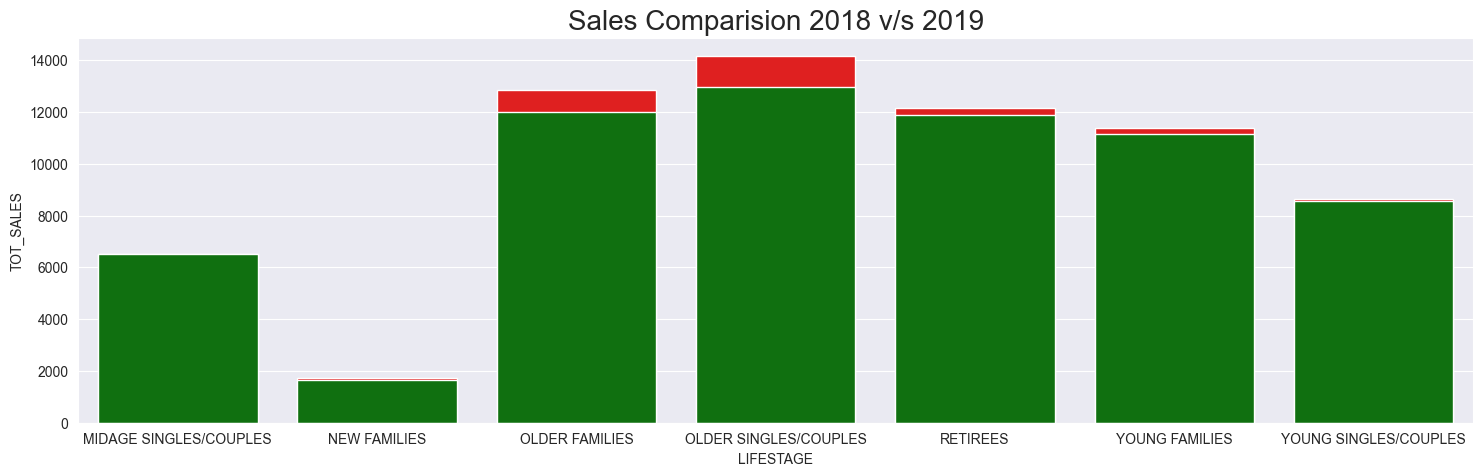

In [276]:
df_2018=df_merged[df_merged['year']==2018]
df_2019=df_merged[df_merged['year']==2019]
df_2018=df_2018.groupby(['LIFESTAGE'])[['TOT_SALES']].sum()
df_2019=df_2019.groupby(['LIFESTAGE'])[['TOT_SALES']].sum()
sns.barplot(x='LIFESTAGE',y='TOT_SALES', data=df_2018, color='red')
sns.barplot(x='LIFESTAGE',y='TOT_SALES', data=df_2019, color='green')
plt.title("Sales Comparision 2018 v/s 2019", fontsize=20)
plt.show()

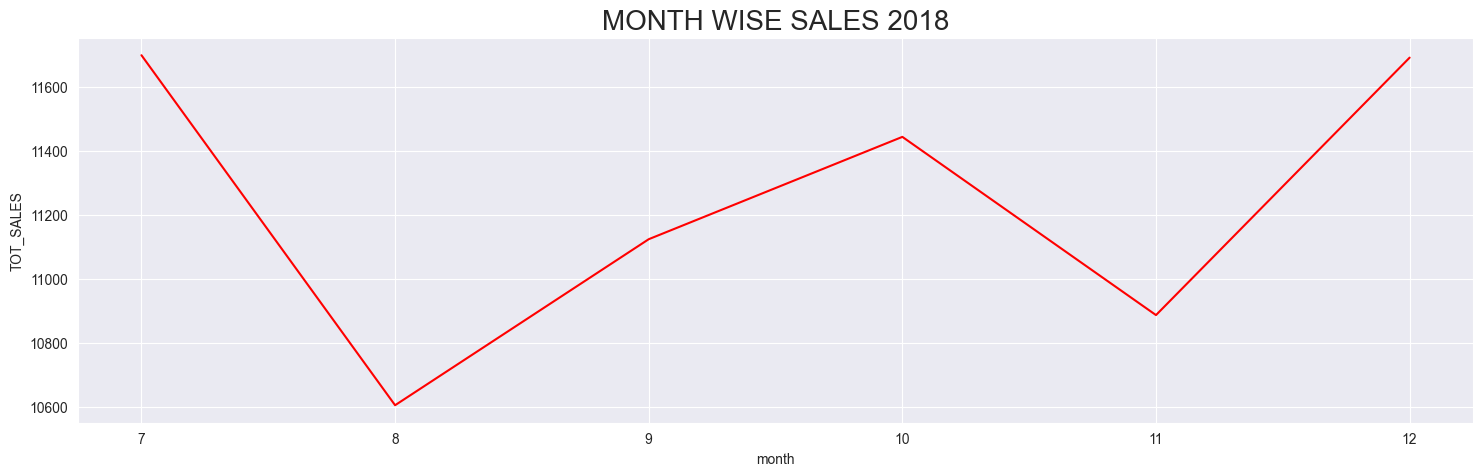

In [277]:
df_2018=df_merged[df_merged['year']==2018]
df_2019=df_merged[df_merged['year']==2019]
df_2018=df_2018.groupby(['month'])[['TOT_SALES']].sum()
df_2019=df_2019.groupby(['month'])[['TOT_SALES']].sum()

sns.lineplot(x='month', y='TOT_SALES', data=df_2018, color='red')
plt.title("MONTH WISE SALES 2018", fontsize=20)
plt.show()



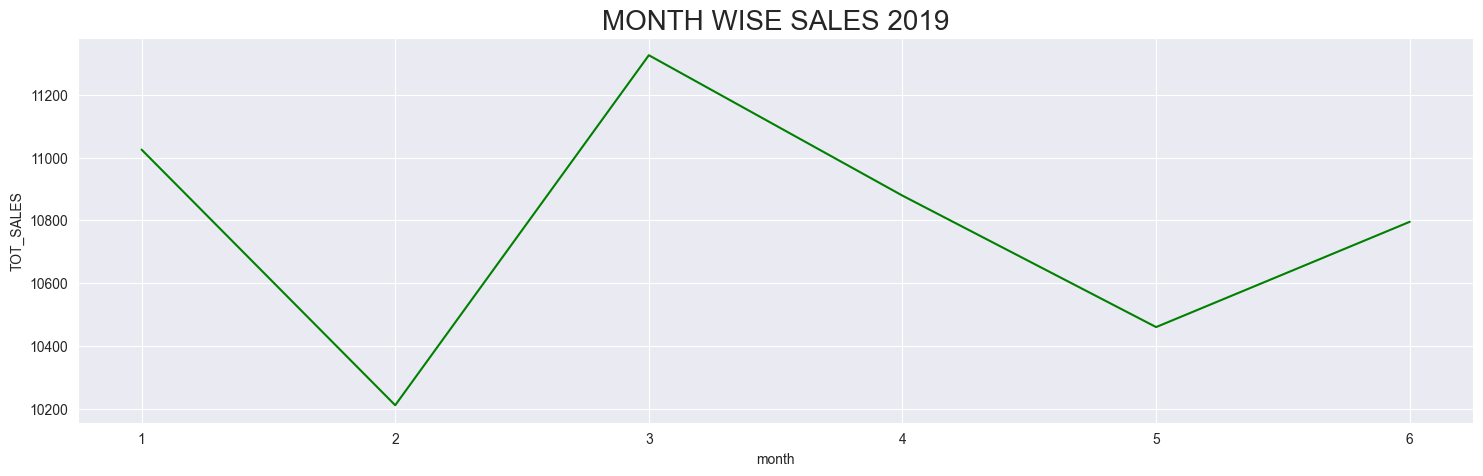

In [278]:
df_2019=df_2019.groupby(['month'])[['TOT_SALES']].sum()
sns.lineplot(x='month', y='TOT_SALES', data=df_2019, color='green')
plt.title("MONTH WISE SALES 2019", fontsize=20)

plt.show()


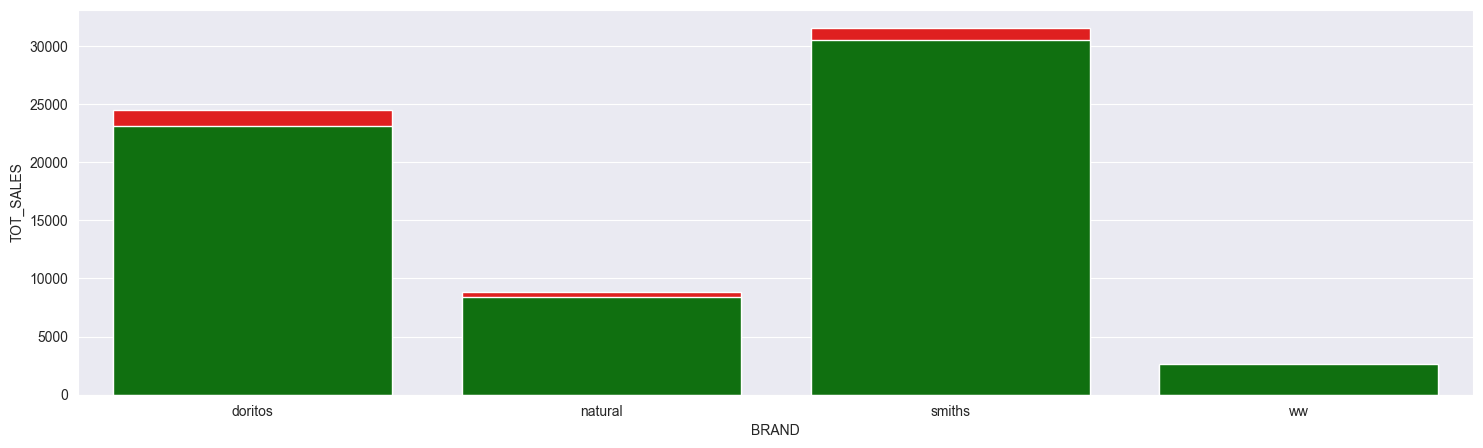

In [279]:
df_2018_BRAND=df_merged[df_merged['year']==2018]
df_2019_BRAND=df_merged[df_merged['year']==2019]

df_2018_BRAND=df_2018_BRAND.groupby(['BRAND'])[['TOT_SALES']].sum()
df_2019_BRAND=df_2019_BRAND.groupby(['BRAND'])[['TOT_SALES']].sum()

sns.barplot(x='BRAND', y='TOT_SALES', data=df_2018_BRAND, color='red')
sns.barplot(x='BRAND', y='TOT_SALES', data=df_2019_BRAND, color='green')

plt.show()


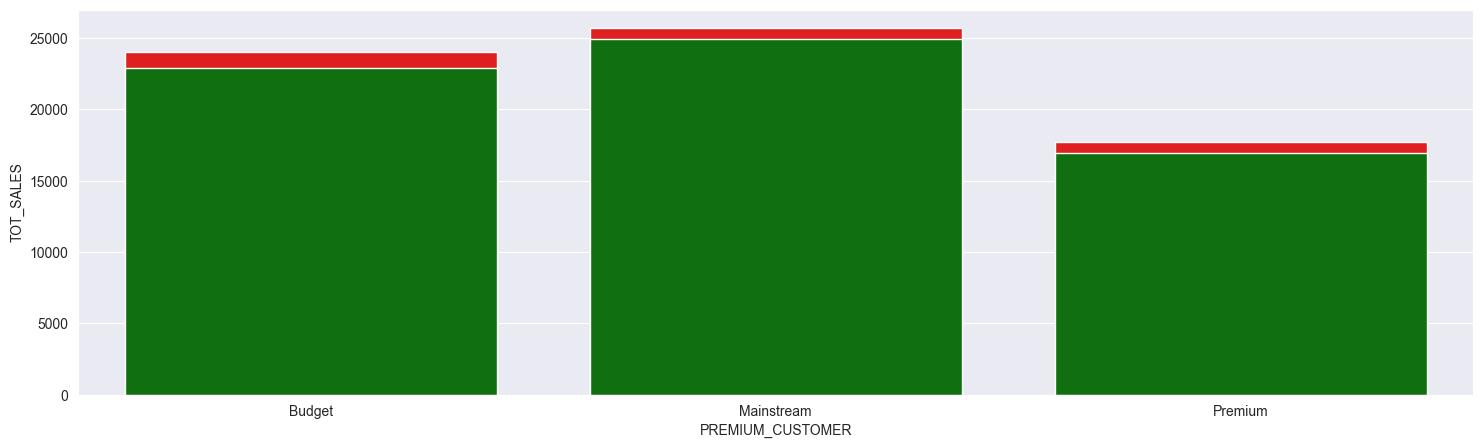

In [280]:
df_2018_customer=df_merged[df_merged['year']==2018]
df_2019_customer=df_merged[df_merged['year']==2019]

df_2018_customer=df_2018_customer.groupby(['PREMIUM_CUSTOMER'])[['TOT_SALES']].sum()
df_2019_customer=df_2019_customer.groupby(['PREMIUM_CUSTOMER'])[['TOT_SALES']].sum()

sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=df_2018_customer, color='red')
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=df_2019_customer, color='green')

plt.show()


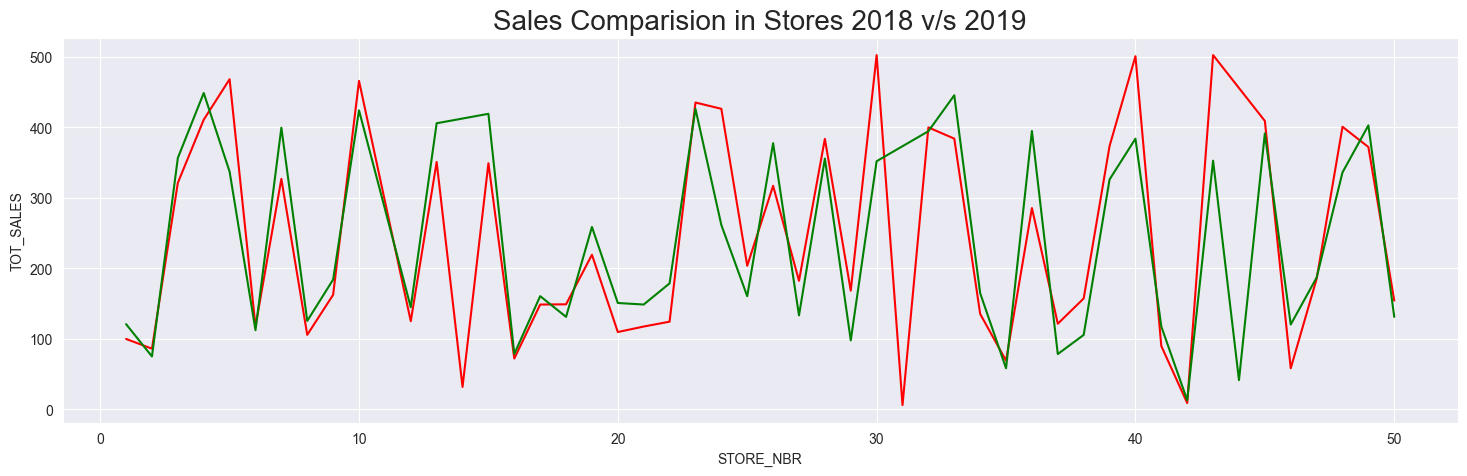

In [285]:
df_2018_store = df_merged[df_merged['year']==2018]
df_2019_store = df_merged[df_merged['year']==2019]

df_2018_store=df_2018_store.groupby(['STORE_NBR'])[['TOT_SALES']].sum()
df_2019_store=df_2019_store.groupby(['STORE_NBR'])[['TOT_SALES']].sum()

sns.lineplot(x='STORE_NBR', y='TOT_SALES', data=df_2018_store, color='red')
sns.lineplot(x='STORE_NBR', y='TOT_SALES', data=df_2019_store, color='green')

plt.title("Sales Comparision in Stores 2018 v/s 2019", fontsize=20)
plt.show()

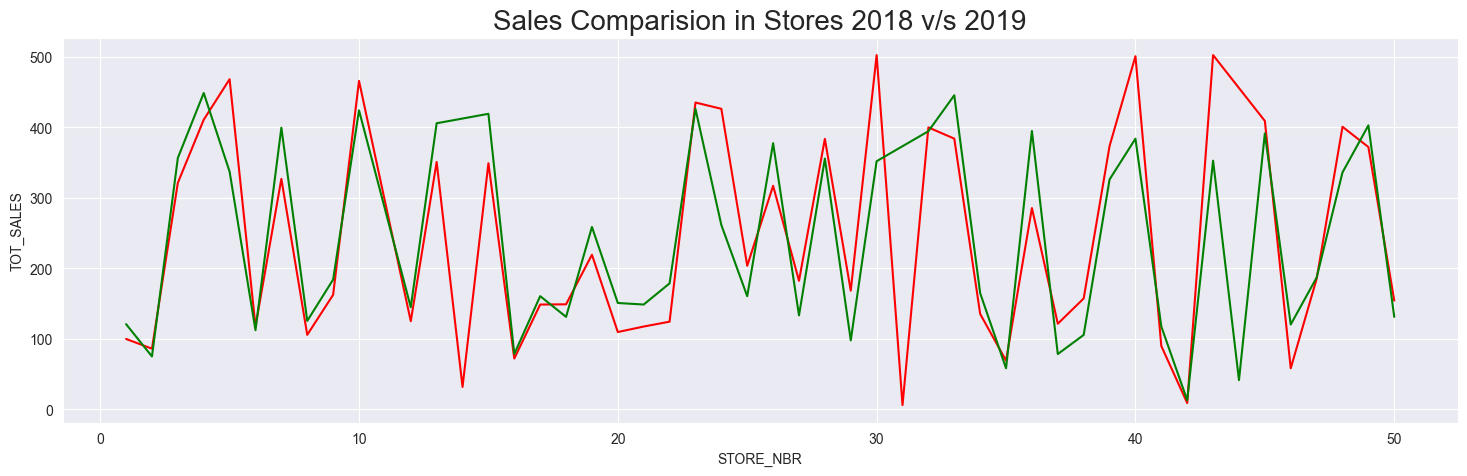

In [284]:
df_merged=df_merged[df_merged['STORE_NBR']<=50]
df_2018_store = df_merged[df_merged['year']==2018]
df_2019_store = df_merged[df_merged['year']==2019]

df_2018_store=df_2018_store.groupby(['STORE_NBR'])[['TOT_SALES']].sum()
df_2019_store=df_2019_store.groupby(['STORE_NBR'])[['TOT_SALES']].sum()

sns.lineplot(x='STORE_NBR', y='TOT_SALES', data=df_2018_store, color='red')
sns.lineplot(x='STORE_NBR', y='TOT_SALES', data=df_2019_store, color='green')

plt.title("Sales Comparision in Stores 2018 v/s 2019", fontsize=20)
plt.show()